# Kriging

In [48]:
import sys
sys.path.append('D:/source/repos')
from utilities.std_imports import *
import sys
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pykrige as pk
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
from pykrige.uk import UniversalKriging
from pykrige.rk import RegressionKriging

### Ordinary Kriging

In [10]:
data = np.array(
    [
        [0.3, 1.2, 0.47],
        [1.9, 0.6, 0.56],
        [1.1, 3.2, 0.74],
        [3.3, 4.4, 1.47],
        [4.7, 3.8, 1.74],
    ]
)
df = pd.DataFrame(data)
df.columns = ['x', 'y', 'z']
df

,x,y,z
0,0.3,1.2,0.47
1,1.9,0.6,0.56
2,1.1,3.2,0.74
3,3.3,4.4,1.47
4,4.7,3.8,1.74


In [11]:
gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

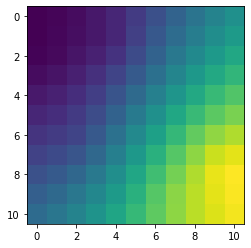

In [43]:
ok = OrdinaryKriging(x=df.x, y=df.y, z=df.z, variogram_model="linear", verbose=False, enable_plotting=False)
z, ss = ok.execute("grid", gridx, gridy)
#kt.write_asc_grid(gridx, gridy, z, filename="output.asc")
#z.data
plt.imshow(z);

### Universal Kriging

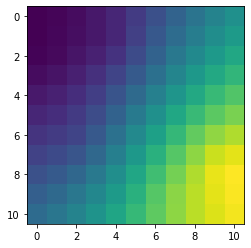

In [46]:
uk = UniversalKriging(x=df.x, y=df.y, z=df.z, variogram_model="linear", verbose=False, enable_plotting=False)
z, ss = uk.execute("grid", gridx, gridy)
kt.write_asc_grid(gridx, gridy, z, filename="output.asc")
plt.imshow(z);

### Kriging Regression

In [49]:
svr_model = SVR(C=0.1, gamma="auto")
rf_model = RandomForestRegressor(n_estimators=100)
lr_model = LinearRegression(normalize=True, copy_X=True, fit_intercept=False)

models = [svr_model, rf_model, lr_model]

housing = fetch_california_housing()

# take the first 5000 as Kriging is memory intensive
p = housing["data"][:5000, :-2]
x = housing["data"][:5000, -2:]
target = housing["target"][:5000]

p_train, p_test, x_train, x_test, target_train, target_test = train_test_split(p, x, target, test_size=0.3, random_state=42)

for m in models:
    print("=" * 40)
    print("regression model:", m.__class__.__name__)
    m_rk = RegressionKriging(regression_model=m, n_closest_points=10)
    m_rk.fit(p_train, x_train, target_train)
    print("Regression Score: ", m_rk.regression_model.score(p_test, target_test))
    print("RK score: ", m_rk.score(p_test, x_test, target_test))

regression model: SVR
Finished learning regression model
Finished kriging residuals
Regression Score:  -0.03405385545698292
RK score:  0.6619557666501965
regression model: RandomForestRegressor
Finished learning regression model
Finished kriging residuals
Regression Score:  0.7029151827617329
RK score:  0.7444164146001923
regression model: LinearRegression
Finished learning regression model
Finished kriging residuals
Regression Score:  0.5277968398381674
RK score:  0.6049089336167248


### Credits & Links

https://github.com/GeoStat-Framework/PyKrige